In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Calibrate Giessen Data

In [2]:
# Import data
pat_id = 'pat_4'
output = pd.read_csv(f"../Data/Giessen/Night/{pat_id}_resampled.csv")
output

,0,1,2,3,4,5,6,7,8,9,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.824339,2.890218,2.958401,3.014484,3.051555,3.072676,3.084245,3.093753,3.106332,3.123122,...,-5.531320,-0.715009,-4.540111,0.600573,0.410065,-0.787575,-0.294332,0.127155,-0.161324,0.086208
1,2.468537,2.541695,2.623106,2.697837,2.758768,2.806704,2.844543,2.875211,2.900010,2.917309,...,-6.621064,0.408444,-4.073112,1.561743,-0.472258,-0.173932,-0.323620,0.220517,-0.527396,-0.019008
2,1.956207,2.045598,2.142903,2.236184,2.331610,2.443358,2.581238,2.743866,2.919773,3.092839,...,0.267168,-3.283988,2.252173,-0.317338,0.058215,-1.892459,0.131948,-0.416572,0.116368,0.117581
3,3.400872,3.442584,3.506324,3.580516,3.653055,3.713308,3.753498,3.771302,3.767630,3.745967,...,-1.588285,-2.862969,-2.863900,-0.515466,1.595705,0.372057,0.847610,-0.207487,-0.114391,0.133214
4,2.795139,2.842213,2.884807,2.914862,2.931744,2.942021,2.953185,2.971741,2.999411,3.034222,...,-5.829633,-0.646013,-4.724306,0.915784,0.809399,-1.200153,-0.301901,0.256347,-0.122675,0.096300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,2.948140,2.975897,3.006111,3.032431,3.051094,3.060332,3.058967,3.044789,3.012987,2.954829,...,1.098696,-5.635040,0.878500,1.068934,0.962332,1.976272,1.285328,1.748491,0.049217,-0.235084
3884,2.678721,2.741287,2.791922,2.818794,2.819677,2.799730,2.767632,2.731453,2.698700,2.675143,...,-4.789452,-0.919854,-1.229998,0.570865,0.035829,-0.035858,-0.001651,-0.266849,0.692812,0.250340
3885,2.635322,2.707906,2.770907,2.806028,2.806701,2.780006,2.738960,2.696742,2.663819,2.644958,...,-4.940340,-1.905568,-1.719312,-0.002245,-0.261728,-0.130873,-0.112594,-0.116499,0.743709,0.315592
3886,2.265161,2.315320,2.361723,2.392788,2.403106,2.396105,2.378025,2.356691,2.339475,2.331079,...,-7.049740,-1.878627,-2.334354,0.083497,-2.631279,1.162542,-0.529182,-0.121969,0.175947,0.106774


In [12]:
# Import Emulator
emulators = pd.read_pickle(f'../Emulators/linear_models_and_r2_scores_500.csv')
emulators

,R2_Score,MSE,Model
a_epad_ind,0.004149,5.939257e-03,LinearRegression()
epad_ind,0.924694,2.384763e-01,LinearRegression()
dia_ind,0.091052,7.425740e-02,LinearRegression()
sys_ind,0.733426,8.119270e+00,LinearRegression()
esp_ind,0.434250,1.421707e-01,LinearRegression()
t_max_dpdt,0.998386,1.483013e-05,LinearRegression()
a_epad,0.959158,3.067360e-01,LinearRegression()
epad,0.905400,1.393654e+00,LinearRegression()
s_a_epad,0.922397,1.176706e-01,LinearRegression()
s_epad,0.909596,6.844501e-01,LinearRegression()


In [13]:
#output_keys = output.iloc[:,101:].columns
output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']
output_keys

['t_max_dpdt',
 'a_epad',
 'epad',
 's_a_epad',
 's_epad',
 'min_dpdt',
 'max_dpdt',
 'A_p',
 'P_max',
 'esp',
 'sys',
 'EF',
 'Ees/Ea',
 'iT',
 'PC1',
 'PC2',
 'PC3']

In [14]:
selected_rows = emulators.loc[output_keys].copy()
selected_rows['Model']['iT'].coef_

array([ 3.16438930e-16,  3.08086889e-15, -3.51752984e-16, -1.12543577e-15,
        1.01010101e+00])

In [15]:
filtered_output = output[output_keys]
filtered_output

,t_max_dpdt,a_epad,epad,s_a_epad,s_epad,min_dpdt,max_dpdt,A_p,P_max,esp,sys,EF,Ees/Ea,iT,PC1,PC2,PC3
0,0.440,28.191473,19.712347,23.672212,15.263275,-363.498343,324.849209,23.951910,60.494437,46.219781,52.668575,0.235966,0.308843,0.000,-5.531320,-0.715009,-4.540111
1,0.440,27.465274,18.351250,22.937938,13.983280,-366.601252,319.920482,22.908262,60.558837,45.074965,53.796053,0.255683,0.343514,0.940,-6.621064,0.408444,-4.073112
2,0.428,32.390509,20.867366,27.598009,16.749012,-386.491277,312.997928,26.628938,65.438522,50.680320,59.742973,0.225528,0.291202,0.944,0.267168,-3.283988,2.252173
3,0.384,28.960241,18.875857,24.362067,14.363817,-368.778216,330.780606,23.918049,61.042976,47.950089,53.179167,0.214486,0.273052,0.984,-1.588285,-2.862969,-2.863900
4,0.440,28.144342,18.890920,23.697010,14.480199,-359.107053,322.598941,23.517631,59.710287,46.032192,52.326318,0.229074,0.297142,0.888,-5.829633,-0.646013,-4.724306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,0.336,28.922640,20.101524,23.948221,15.233083,-400.969091,357.868320,24.512082,64.801324,48.997532,56.127948,0.243881,0.322543,0.936,1.098696,-5.635040,0.878500
3884,0.416,29.979735,20.223736,24.949023,15.406708,-399.782482,352.319446,25.101736,64.965034,47.350325,56.080512,0.271141,0.372008,0.836,-4.789452,-0.919854,-1.229998
3885,0.420,28.261174,19.825187,23.354352,15.096246,-396.065424,347.249035,24.043180,63.916084,49.169662,55.563042,0.230715,0.299909,0.916,-4.940340,-1.905568,-1.719312
3886,0.432,27.271059,19.649824,22.566902,15.150053,-381.965279,331.671587,23.460441,62.618596,47.874164,55.717172,0.235464,0.307983,0.924,-7.049740,-1.878627,-2.334354


In [16]:
## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15
t_mu = 1

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2
t_sd = 0.15**2

mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
Sigma_0 = np.diag(Sd)

# Build beta matrix (d * p, where d is dimension of y_obs and p is dinemnsion of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept), 1)


# Compute the posterior covariance
Sigma_post_inv = (beta_matrix.T @ beta_matrix) + np.linalg.inv(Sigma_0)
Sigma_post = np.linalg.inv(Sigma_post_inv)


posterior_means = []

for row in range(len(filtered_output)):
 # Select observation and reshape to be (d, 1)
 Y_obs = np.array(filtered_output.T[row])
 Y_obs = Y_obs.reshape(len(Y_obs), 1)
 
  
 #  Scale observation by intercepts of models
 Y_scaled = Y_obs - intercept
 
 # Compute the posterior mean
 Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)
 
 posterior_means.append(Mu_post.squeeze()) 




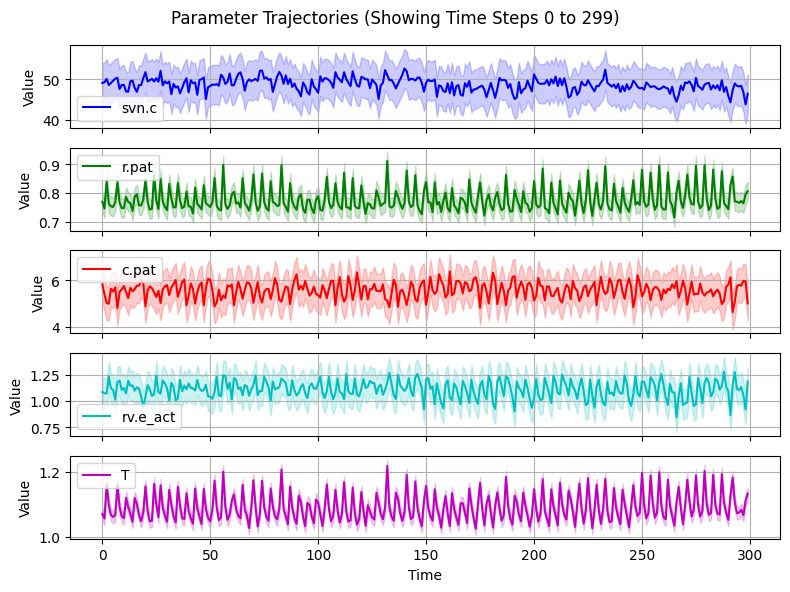

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array
posterior_means = np.array(posterior_means.copy())  # Shape: (3888, 5)
posterior_variances = np.array(Sigma_post).diagonal().reshape(-1, 1)  # Shape: (5, 1)

# Define the time range to include in the plot (e.g., first 1000 steps)
time_range = slice(0, 300)  # Change this to control the number of time indexes

T = np.arange(len(posterior_means))[time_range]  # Time steps (subset)
params = 5  # Number of parameters

# Colors for different parameters
colors = ['b', 'g', 'r', 'c', 'm']

# Plot each parameter on a separate subplot
fig, axes = plt.subplots(params, 1, figsize=(8, 6), sharex=True)

param_names = ['svn.c', 'r.pat', 'c.pat', 'rv.e_act', 'T']

for i in range(params):
    mean = posterior_means[time_range, i]  # Mean trajectory (subset)
    std_dev = np.sqrt(posterior_variances[i])  # Constant SD for all timesteps

    axes[i].plot(T, mean, color=colors[i], label=param_names[i])
    axes[i].fill_between(T, mean - 2 * std_dev, mean + 2 * std_dev, color=colors[i], alpha=0.2)
    
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid()

axes[-1].set_xlabel('Time')
fig.suptitle(f'Parameter Trajectories (Showing Time Steps {T[0]} to {T[-1]})')
plt.tight_layout()
plt.show()

In [21]:
results = pd.DataFrame(posterior_means)
results

,0,1,2,3,4
0,49.028967,0.769367,5.824705,1.085042,1.070072
1,49.182499,0.745860,5.393129,1.072276,1.055369
2,50.027215,0.842232,5.026550,1.071434,1.160795
3,48.530393,0.761747,4.985280,1.233828,1.097184
4,49.021570,0.753671,5.632730,1.119814,1.066728
...,...,...,...,...,...
3883,50.137753,0.794425,4.462411,1.328710,1.108154
3884,49.374675,0.793766,5.267683,1.131424,1.070933
3885,51.480929,0.792192,5.150396,1.162145,1.070981
3886,53.257942,0.791484,5.466172,1.116784,1.067820
